<a href="https://colab.research.google.com/github/nwilliams030/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Nicole%20WilliamsLS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [1]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

import pandas as pd
persons_data_url = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv'
persons_data = pd.read_csv(persons_data_url)
persons_data.head(5)

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [0]:
#Here I am making a starting out by using our y variable (weight), and putting
#it in a crosstabulation with our x variable (age.)
pd.crosstab(persons_data['weight'],persons_data['age'])

In [3]:
#Unfortunately all of the data is continuous, so I need to bin the variables.
#I also need to revert back to an earlier version of pandas to prevent a binning error. 
!pip install pandas==0.23.4


In [10]:
#Time 2 bin
weight_bins = pd.cut(persons_data['weight'],8)
age_bins = pd.cut(persons_data['age'], 8)
#Here I am creating a crosstabulation of the binned y variable weight, binned x
#variable age, and then normalizing the columns to all add up to 100%
pd.crosstab(weight_bins, age_bins, normalize="columns")

age,"(17.938, 25.75]","(25.75, 33.5]","(33.5, 41.25]","(41.25, 49.0]","(49.0, 56.75]","(56.75, 64.5]","(64.5, 72.25]","(72.25, 80.0]"
weight,,,,,,,,
"(99.854, 118.25]",0.201299,0.239521,0.244444,0.160,0.195122,0.156863,0.128049,0.134328
"(118.25, 136.5]",0.168831,0.167665,0.222222,0.248,0.235772,0.202614,0.176829,0.134328
"(136.5, 154.75]",0.194805,0.203593,0.172222,0.184,0.178862,0.176471,0.164634,0.141791
"(154.75, 173.0]",0.194805,0.173653,0.094444,0.176,0.138211,0.124183,0.176829,0.156716
"(173.0, 191.25]",0.103896,0.083832,0.116667,0.088,0.121951,0.143791,0.115854,0.171642
"(191.25, 209.5]",0.090909,0.047904,0.111111,0.064,0.065041,0.117647,0.121951,0.119403
"(209.5, 227.75]",0.019481,0.071856,0.027778,0.056,0.056911,0.065359,0.060976,0.104478
"(227.75, 246.0]",0.025974,0.011976,0.011111,0.024,0.008130,0.013072,0.054878,0.037313


In [13]:
#Bin part 2
exercise_bins = pd.cut(persons_data['exercise_time'], 8)
pd.crosstab(weight_bins, exercise_bins)

exercise_time,"(-0.3, 37.5]","(37.5, 75.0]","(75.0, 112.5]","(112.5, 150.0]","(150.0, 187.5]","(187.5, 225.0]","(225.0, 262.5]","(262.5, 300.0]"
weight,,,,,,,,
"(99.854, 118.25]",22,22,23,26,29,31,29,40
"(118.25, 136.5]",20,18,28,23,26,34,34,49
"(136.5, 154.75]",24,20,32,18,39,23,33,24
"(154.75, 173.0]",20,25,42,24,24,18,25,6
"(173.0, 191.25]",28,25,32,24,24,8,0,0
"(191.25, 209.5]",30,24,28,25,5,0,0,0
"(209.5, 227.75]",23,26,17,2,0,0,0,0
"(227.75, 246.0]",24,4,0,0,0,0,0,0


##Visualizations

In [0]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

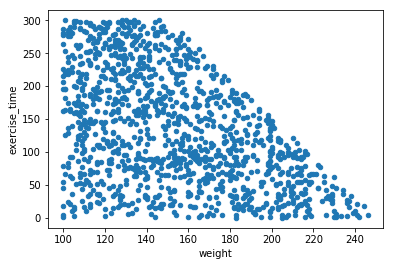

In [15]:
persons_data.plot.scatter(x='weight', y ='exercise_time')

In [0]:
>>> df = pd.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],                   [6.4, 3.2, 1], [5.9, 3.0, 2]],
...                   columns=['length', 'width', 'species'])
>>> ax1 = df.plot.scatter(x='length',
...                       y='width',
...                       c='DarkBlue')

>>> ax2 = df.plot.scatter(x='length',
...                       y='width',
...                       c='species',
...                       colormap='viridis')

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data? 
    - Within this data set, we had the variables: age, weight, and exercise time. All three were technically continuous, which was why we had to bin them to force them to be discrete and ordinal. 
    - Ryan told us to use weight as the Y, or dependant, variable becuase it doesnt have to be one. Consequently, I used age and exercise time as x variables.
2.  What are the relationships between the variables?
    - As exercise time increases, weight decreases. So much so that people in the upper 50% of exersize time categories do not exist in the very top weight categories.
3.  Which relationships are "real", and which spurious?
    - It's hard to know anything for sure, but the correlation between weight and exercise time does seem fairly legitimate. 


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)